In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('../ML PROJ/gold_price_data.csv')

In [10]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
gold_data = gold_data.drop('Date', axis = 1)

In [17]:
# Correlation
correlation = gold_data.corr()

<Axes: >

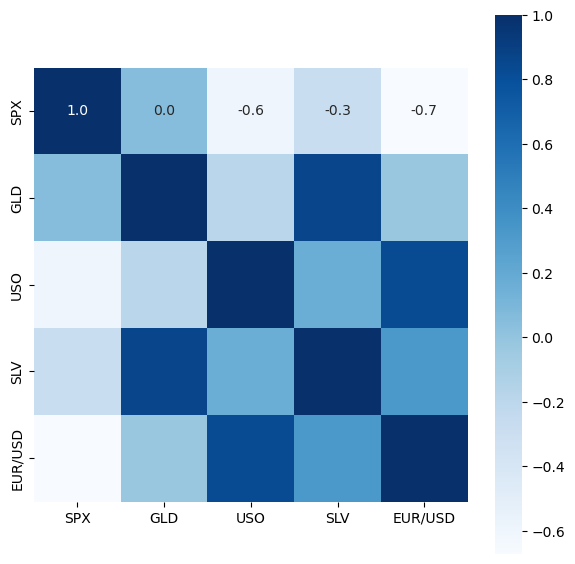

In [21]:
plt.figure(figsize = (7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Blues')

In [22]:
# correlation values of GLD 

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\rupab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


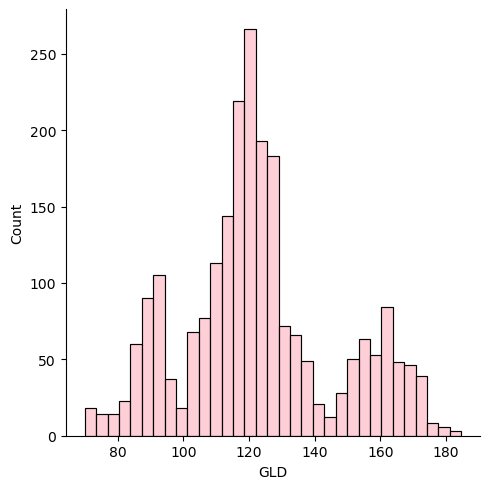

In [27]:
#checking the distribution of GLD price
sns.displot(gold_data['GLD'], color = 'pink')

In [29]:
X = gold_data.drop('GLD', axis = 1)
Y = gold_data['GLD']

In [30]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [31]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [36]:
# Model Training Random Forest Regressor

regressor = RandomForestRegressor (n_estimators = 100)

In [37]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [38]:
# Model Evaluation

test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.64849919  82.05579962 115.94290008 127.73820102 120.87760117
 154.50209699 150.37719751 126.21950019 117.5711985  126.10880048
 116.56270063 172.07260068 141.69579842 168.01799847 115.34049989
 117.60590053 138.46710358 170.05580088 159.12800358 161.60640024
 155.21820062 125.34169999 175.34039962 157.13950259 125.26760031
  93.80159954  77.13600028 120.42570023 119.14829952 167.40380028
  88.18400069 125.15230012  91.21430095 117.74959977 121.01349965
 136.54160083 115.28530113 115.05070093 146.84330019 107.23960095
 104.18960223  87.23169782 126.5883003  118.22079978 153.43189833
 119.65839969 108.23790041 107.90179866  93.22600056 127.24169735
  75.10680007 113.64229913 121.51920003 111.42979876 118.90239933
 120.66439931 159.21329994 169.55970075 147.09389645  85.87179844
  94.24380052  86.78969923  90.60180031 118.88510087 126.46640068
 127.57659947 170.14260058 122.22299926 117.48279899  98.3571999
 168.6639023  143.18759846 132.07700224 121.1394021  120.78659952
 119.675800

In [39]:
# R squared error 

error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.9895759443010188


In [40]:
# Comparing actual and predicted values in a plot

Y_test = list(Y_test)

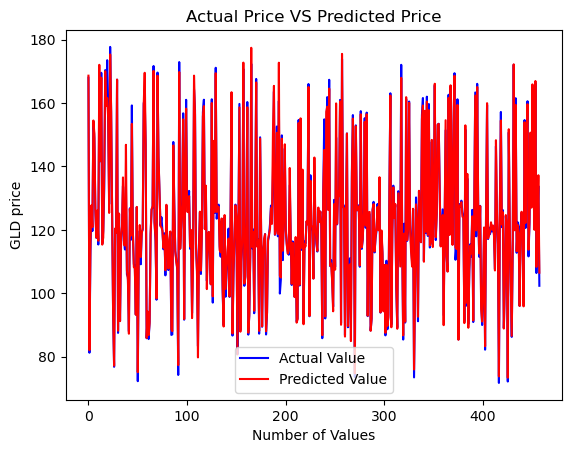

In [55]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'red', label = 'Predicted Value')

plt.title('Actual Price VS Predicted Price')

plt.xlabel('Number of Values')
plt.ylabel('GLD price')
plt.legend()
plt.show()